# Day 6-7: Exploratory Data Analysis (EDA)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.	Basic Statistics

In [12]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(df.describe())
print('-----------------------------------------------------------------------------------------')
print(df['FraudFound_P'].value_counts())  # Check class balance
df

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15419.000000        15419.000000  15419.000000  15419.000000   
mean       2.788637            2.694079     40.685842      0.059861   
std        1.287611            1.259082     12.181893      0.237237   
min        1.000000            1.000000     16.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     39.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count   15419.00000  15419.000000  15419.000000  15419.000000  15419.000000  
mean     7710.90168      8.482846    407.704780      2.487840   1994.866528  
std      4451.37980      4.599798     43.952379      1.119482      0.803309  
min         1.00000      1.000000    300.000000 

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15415,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15416,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15417,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


2.	Fraud Distribution

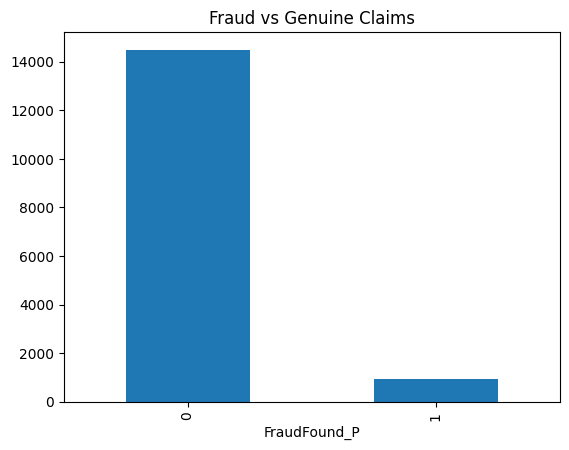

In [13]:

df['FraudFound_P'].value_counts().plot(kind='bar')
plt.title('Fraud vs Genuine Claims')
plt.savefig('EDA_Charts/Fraud vs Genuine Claims.png')
plt.show()

3.	Analyze Key Features

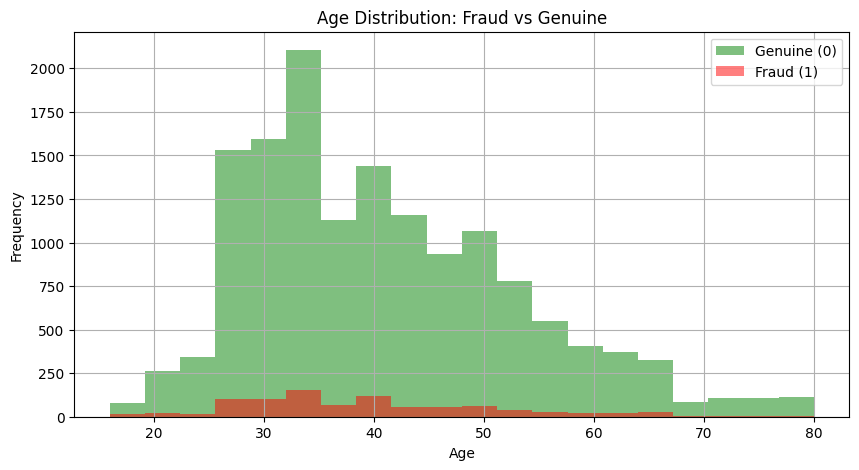

In [14]:
# 1. Age Distribution by Fraud
plt.figure(figsize=(10, 5))
df[df['FraudFound_P'] == 0]['Age'].hist(bins=20, alpha=0.5, label='Genuine (0)', color='green')
df[df['FraudFound_P'] == 1]['Age'].hist(bins=20, alpha=0.5, label='Fraud (1)', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution: Fraud vs Genuine')
plt.legend()
plt.savefig('EDA_Charts/age_distribution_fraud.png')
plt.show()

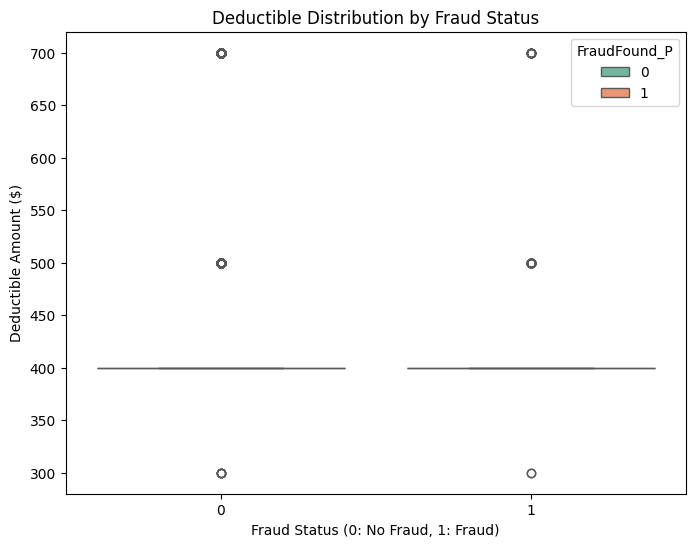

In [15]:
# 2. Total Claim Amount (sum of all claim types)
plt.figure(figsize=(8, 6))
sns.boxplot(x='FraudFound_P', y='Deductible', data=df, palette='Set2', hue='FraudFound_P')
plt.title('Deductible Distribution by Fraud Status')
plt.xlabel('Fraud Status (0: No Fraud, 1: Fraud)')
plt.ylabel('Deductible Amount ($)')
plt.savefig('deductible_boxplot.png')
plt.show()

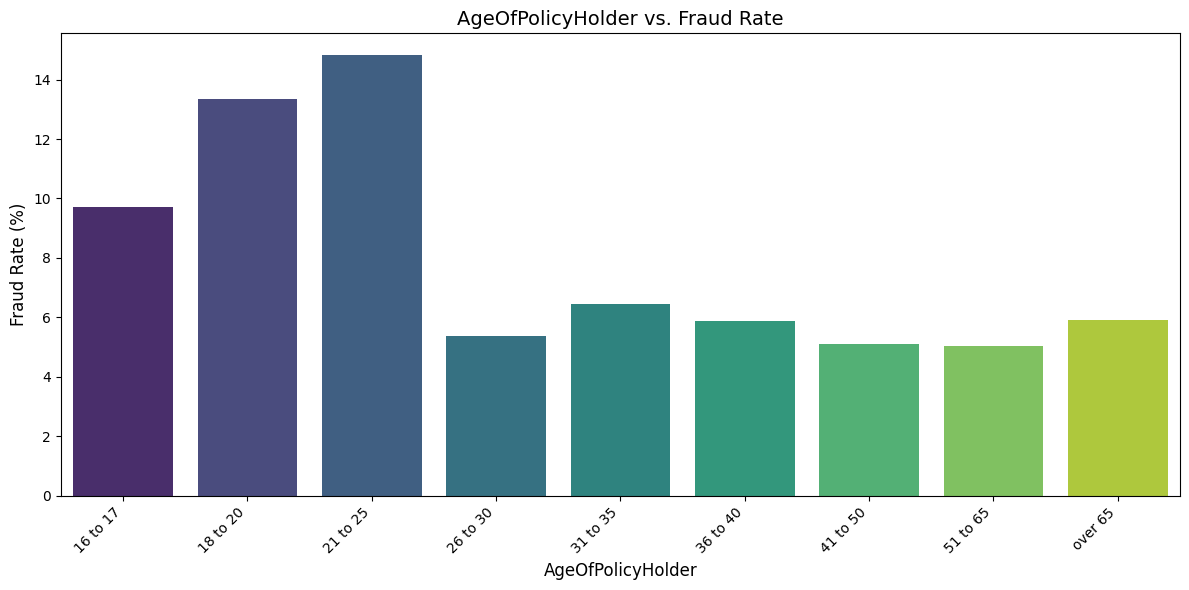

In [16]:
plt.figure(figsize=(12, 6))
fraud_rate = df.groupby('AgeOfPolicyHolder')['FraudFound_P'].mean()
sns.barplot(    x=fraud_rate.index, y=fraud_rate.values * 100, palette='viridis', hue=fraud_rate.index, legend=False)
plt.title(f'{'AgeOfPolicyHolder'} vs. Fraud Rate', fontsize=14)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xlabel('AgeOfPolicyHolder', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'EDA_Charts/{'AgeOfPolicyHolder'}_fraud_rate.png')
plt.show()

<Figure size 700x500 with 0 Axes>

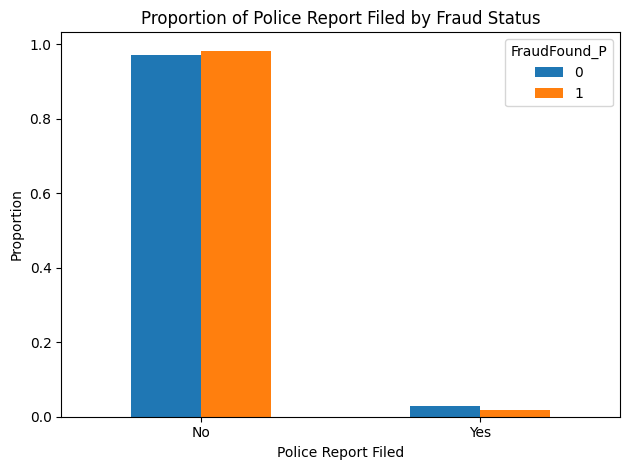

In [17]:
# 3. Police Report Filed
plt.figure(figsize=(7, 5))
pd.crosstab(df['PoliceReportFiled'], df['FraudFound_P'], normalize='columns').plot(kind='bar')
plt.title('Proportion of Police Report Filed by Fraud Status')
plt.xlabel('Police Report Filed')
plt.ylabel('Proportion')
plt.legend(title='FraudFound_P')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('EDA_Charts/police_report_filed_fraud_proportion.png')
plt.show()


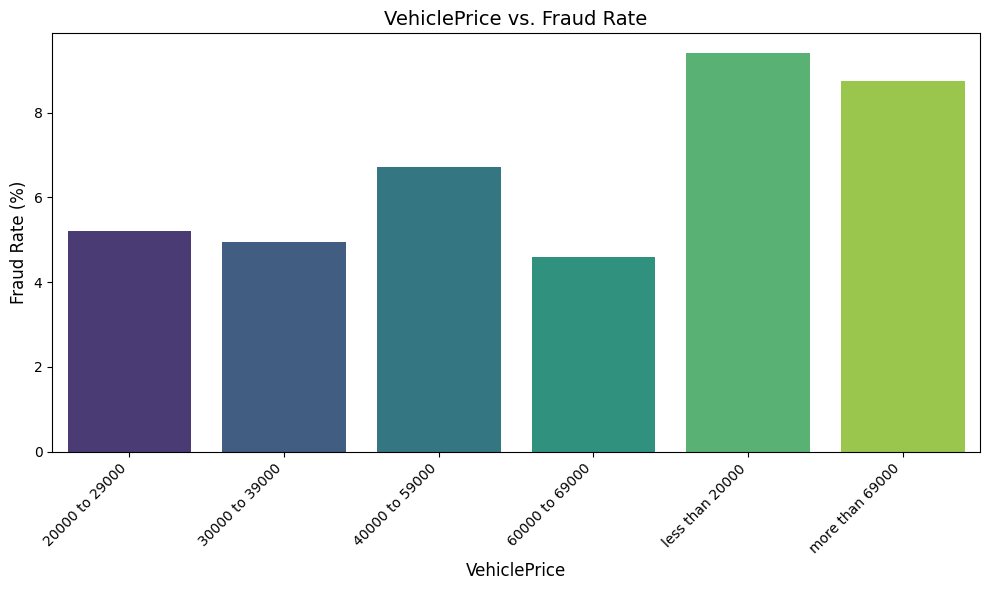

In [18]:
# 4. Vehicle Price vs Fraud Rate
plt.figure(figsize=(10, 6))
fraud_rate = df.groupby('VehiclePrice')['FraudFound_P'].mean()
sns.barplot(x=fraud_rate.index, y=fraud_rate.values * 100, palette='viridis',hue=fraud_rate.index, legend=False)
plt.title(f'{'VehiclePrice'} vs. Fraud Rate', fontsize=14)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xlabel('VehiclePrice', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'EDA_Charts/{'VehiclePrice'}_fraud_rate.png')
plt.show()

- Age distribution
-	Policy type breakdown
-	Geographic patterns

4.	Correlation Analysis

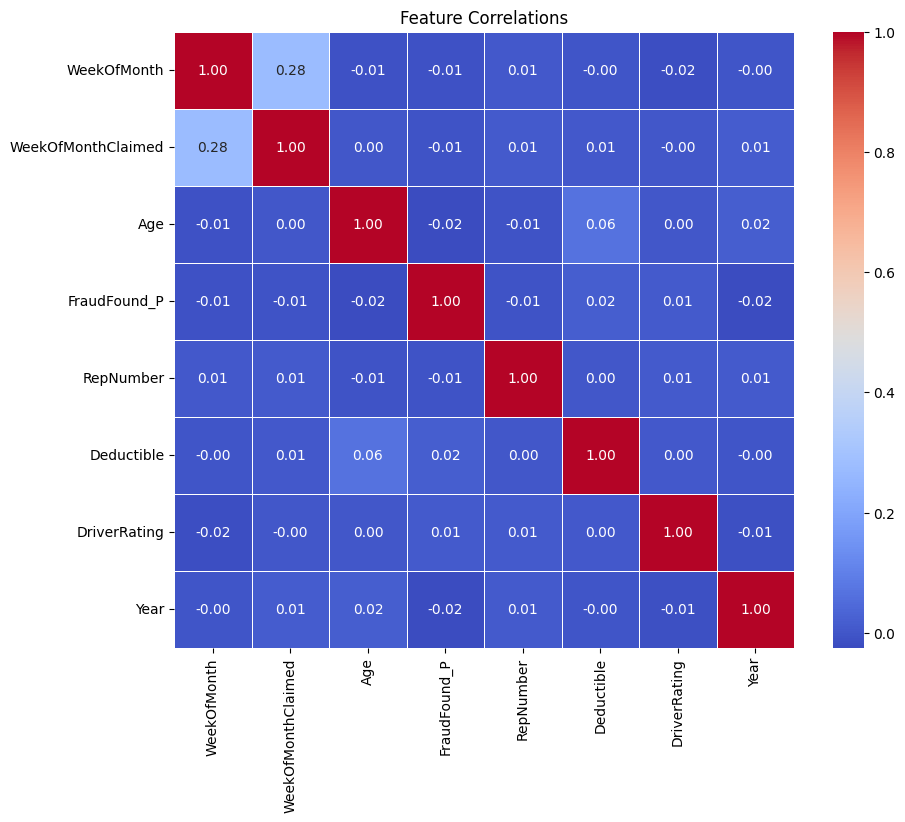

In [19]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols = numerical_cols.drop('PolicyNumber',axis = 1)
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlations')
plt.savefig('EDA_Charts/correlation_heatmap.png')
plt.show() 

# Correlation Analysis Report

In [20]:
# Correlation Analysis Report
data = {'Column 1': ['WeekOfMonth', 'FraudFound_P', 'FraudFound_P', 'FraudFound_P', 'All Other Pairs'],
        'Column 2': ['WeekOfMonthClaimed', 'Age', 'Deductible', 'DriverRating', '(Various)'],
        'Coefficient (r)': ['0.28', '0.022', '0.017', '-0.025', '≈ ± 0.01 or less'],
        'Implication': ['Moderate temporal link', 'Very weak predictor', 'Very weak predictor', 'Very weak predictor', 'Not significant']}
df_corr_summary = pd.DataFrame(data)
print("Concise Pairwise Correlation Analysis\n")
print(df_corr_summary.to_markdown(index=False, numalign="left", stralign="left"))

Concise Pairwise Correlation Analysis

| Column 1        | Column 2           | Coefficient (r)   | Implication            |
|:----------------|:-------------------|:------------------|:-----------------------|
| WeekOfMonth     | WeekOfMonthClaimed | 0.28              | Moderate temporal link |
| FraudFound_P    | Age                | 0.022             | Very weak predictor    |
| FraudFound_P    | Deductible         | 0.017             | Very weak predictor    |
| FraudFound_P    | DriverRating       | -0.025            | Very weak predictor    |
| All Other Pairs | (Various)          | ≈ ± 0.01 or less  | Not significant        |


5.	Feature Relationships
-	Scatter plots for claim_amount vs age
-	Box plots for categorical features vs fraud

### Box plots for categorical features vs fraud

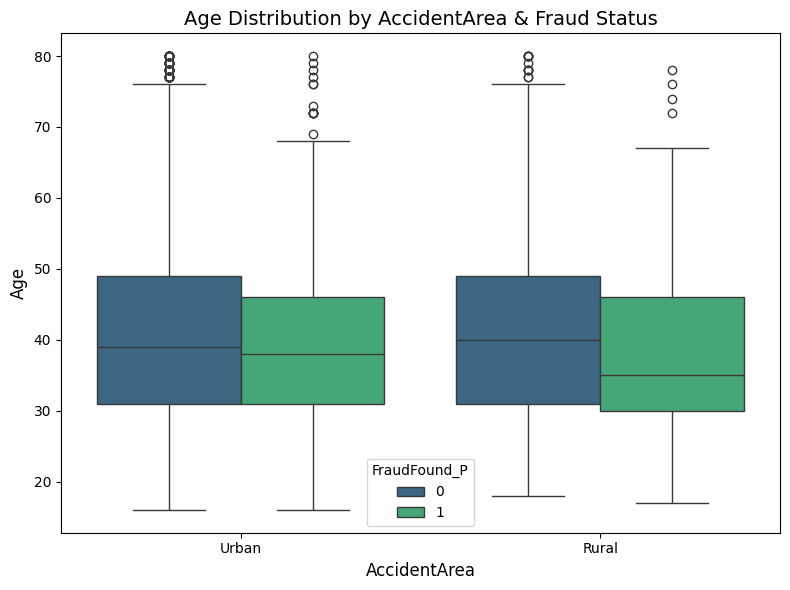

In [21]:
# Age Distribution by AccidentArea & Fraud Status 

plt.figure(figsize=(8, 6))
colname='AccidentArea'
sns.boxplot(x=colname, y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {colname} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel(colname, fontsize=12)
plt.tight_layout()
plt.savefig('EDA_Charts/boxplot_accident_area.png')
plt.show()

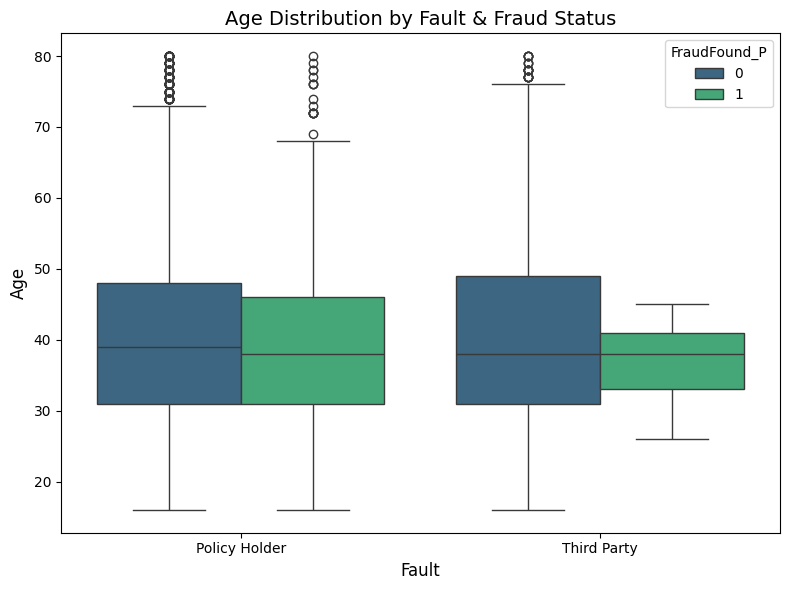

In [22]:
colname='Fault'
plt.figure(figsize=(8, 6))
sns.boxplot(x=colname, y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {colname} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel(colname, fontsize=12)
plt.tight_layout()
plt.savefig('EDA_Charts/boxplot_fault.png')
plt.show()

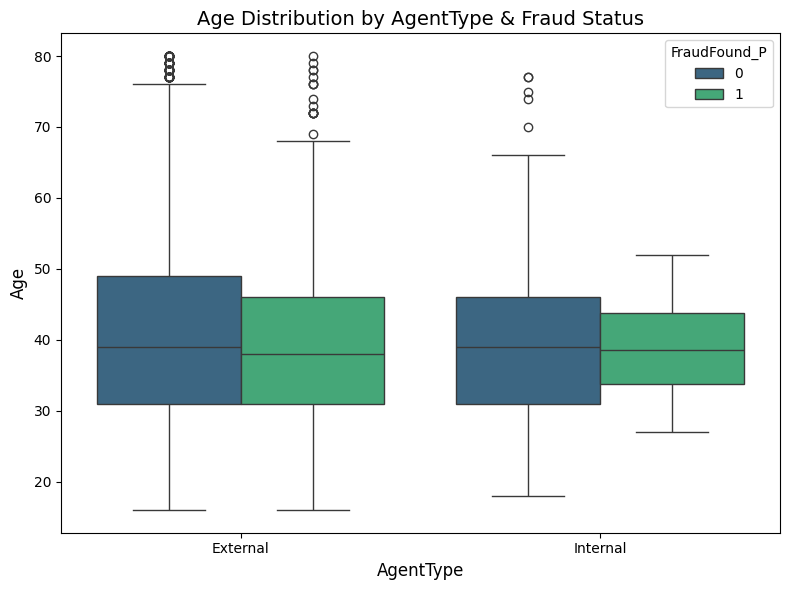

In [23]:
colname='AgentType'
plt.figure(figsize=(8, 6))
sns.boxplot(x=colname, y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {colname} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel(colname, fontsize=12)
plt.tight_layout()
plt.savefig('EDA_Charts/boxplot_agent_type.png')
plt.show()

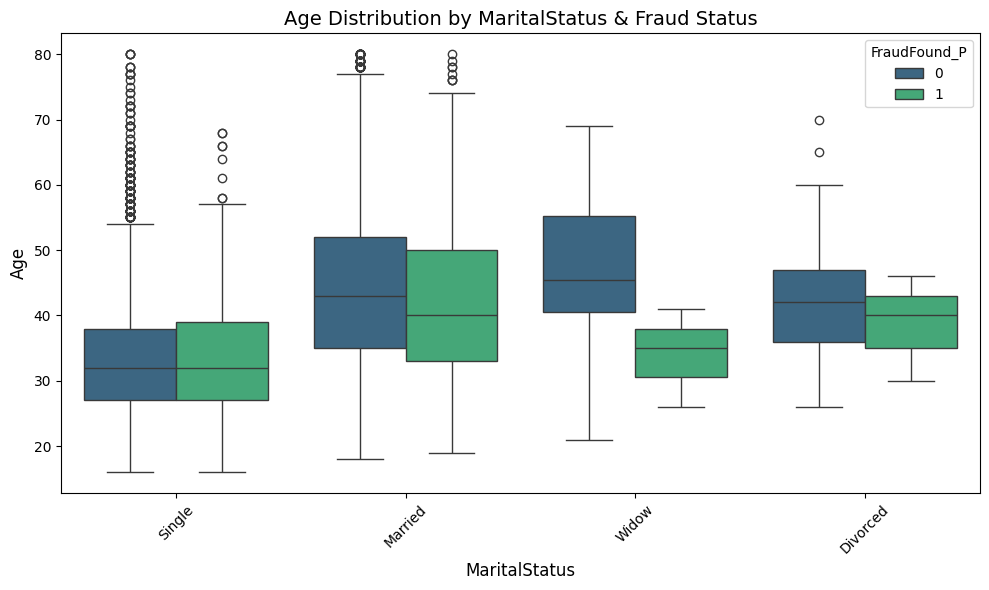

In [24]:

colname='MaritalStatus'
plt.figure(figsize=(10, 6))
sns.boxplot(x=colname, y='Age', hue='FraudFound_P', data=df, palette='viridis')
plt.title(f'Age Distribution by {colname} & Fraud Status', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel(colname, fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('EDA_Charts/boxplot_marital_status.png')
plt.show()

<Axes: xlabel='FraudFound_P', ylabel='Deductible'>

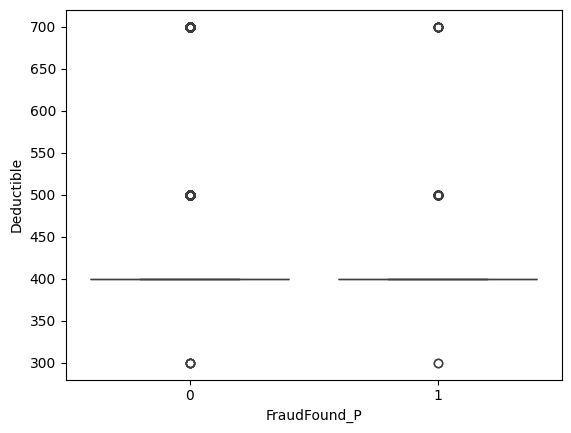

In [25]:
sns.boxplot(x='FraudFound_P', y='Deductible', data=df)

6.	Create EDA Report
-	Document findings in notebook
-	Note: Which features seem important?
-	Note: Any data quality issues?
-	Note: Class imbalance ratio


In [26]:
# Select the categorical columns identified as important
categorical_features = ['Fault', 'AgentType', 'AccidentArea', 'MaritalStatus']

# Exploratory Data Analysis (EDA) Report

## 1. Data Structure & Quality

<b>Dataset Size:</b> 15,419 rows, 33 columns.

<b>Completeness:</b> 0 null values found across the dataset. No imputation required.

<b>Data Types:</b> - 9 Numeric columns (e.g., Age, Deductible, DriverRating).

<b>24 Categorical columns</b> (e.g., Make, AccidentArea, Fault).

<b>Recommendation:</b> Drop 'PolicyNumber' to prevent multicollinearity in modeling.

## 2. Class Imbalance Analysis

<b>Target Variable:</b> FraudFound_P (0 = Genuine, 1 = Fraud)

<b>Distribution:</b>

    Genuine Claims (0): ~94% (14,496 records)

    Fraudulent Claims (1): ~6% (923 records)

<b>Imbalance Ratio:</b> Approximately 15.7 : 1

<b>Impact:</b>Accuracy is a misleading metric; models will require resampling (SMOTE) or specific evaluation metrics (F1-Score, ROC-AUC).

## 3. Feature Importance Findings

### <b>Strong Predictors (Key Categorical Features)</b> ###
Categorical features showed the strongest separation between fraud and genuine cases:

<b>Fault:</b> The single strongest indicator. Claims where the Policy Holder is at fault show a significantly higher fraud rate (>10%) compared to Third Party fault (~1%).

<b>Vehicle Price:</b> Positive trend observed; vehicles in higher price brackets (>$69k) correlate with higher fraud rates.

<b>Age of Policy Holder:</b> Younger policyholders (26–30 range) exhibit higher fraud frequency compared to older groups.

<b>Agent Type:</b> Claims filed through 'Internal' agents have a noticeably higher fraud rate than 'External' agents.

<b>Accident Area:</b> 'Urban' areas show a higher incidence of fraud compared to 'Rural' areas.

### <b>Weak Predictors (Numeric Features)</b> ###
Numeric features generally showed poor linear correlation with fraud:

<b>Deductible:</b> Distribution is nearly identical for both Fraud and Genuine cases (Median $400).

<b>Driver Rating:</b> Correlation with fraud is negligible (-0.02).

<b>Age (Numeric):</b> Weak linear correlation (0.02). However, when treated as categorical bins (Age Groups), it becomes predictive.

## 4. Outlier Analysis

<b>Age:</b> Outliers detected via IQR analysis in specific sub-groups (e.g., 'Widow' and 'Single' marital statuses), though values remain within realistic human age ranges.

<b>Deductible:</b> Minor outliers observed at $500 and $700 levels, but these do not distinctly separate fraud classes.